# Task in Hand
#### We are going to predict the price of car based on its attributes like 
#### Brand, Mileage, Engine Volume, Year of production
#### Since we are predicting a continous numeric data so we will use Linear Regression 

## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv('C:/Users/HP/Downloads/1.04.+Real-life+example.csv')
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

## Preprocessing

#### Exploring the descriptive statistics 

In [3]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Selecting the columns of interest

In [4]:
data.drop('Model', axis = 1, inplace = True )
data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with the missing values

In [5]:
num = data['Price'].isna().sum()
percentage = num / len(data)
print('Percentage of data with null values in price : {0}'.format(percentage)) # 0.0395
# The rule of thumb is if the % of missing values is less than 5% we can drop it 

num = data['EngineV'].isna().sum()
percentage = num / len(data)
print('Percentage of data with null values in engine volume: {0}'.format(percentage))# 0.0345

Percentage of data with null values in price : 0.03958573072497123
Percentage of data with null values in engine volume: 0.03452243958573072


In [6]:
data.dropna( axis = 0, inplace = True)

In [7]:
data.describe(include = 'all')
# Now they are all of same sizes

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Observing the probability distributions

#### The observations that are behaving abnormally are going to cause problem and will make the regression line to flatten at the end so we need to remove top 1% of data

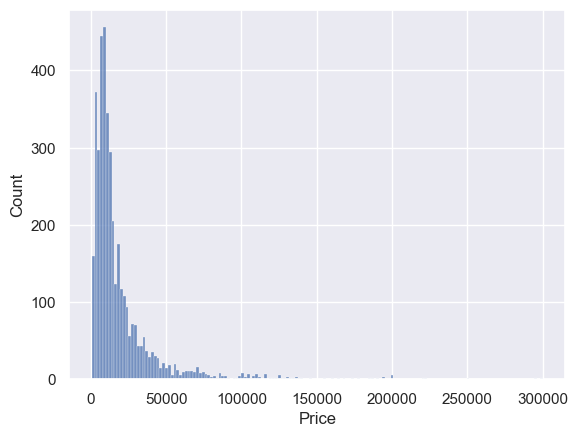

In [8]:
sns.histplot(data['Price']);

### Dealing with the outliers

In [9]:
q = data['Price'].quantile(0.99) # q is assigned a value of 129812
data = data[data['Price'] < q]
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


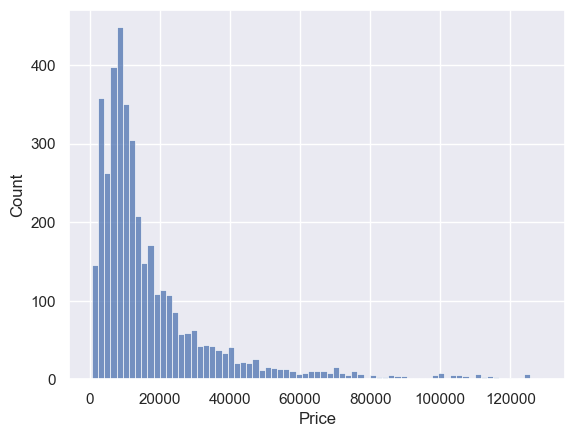

In [10]:
sns.histplot(data['Price']);
# Now the outliers are less in number

In [11]:
q = data['Mileage'].quantile(0.99) # q is assigned a value of 129812
data = data[data['Mileage'] < q]
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


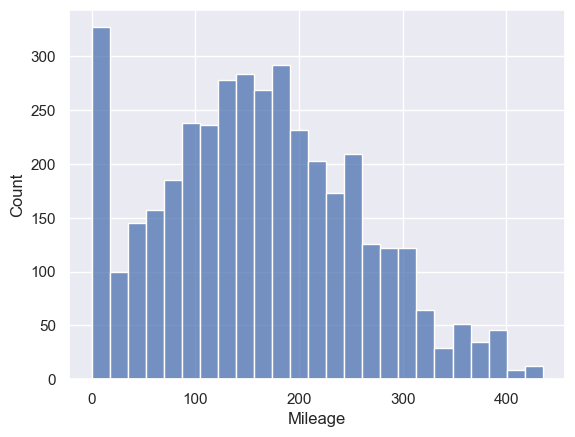

In [12]:
sns.histplot(data['Mileage']);
# Now the outliers are less in number

<Axes: xlabel='EngineV', ylabel='Count'>

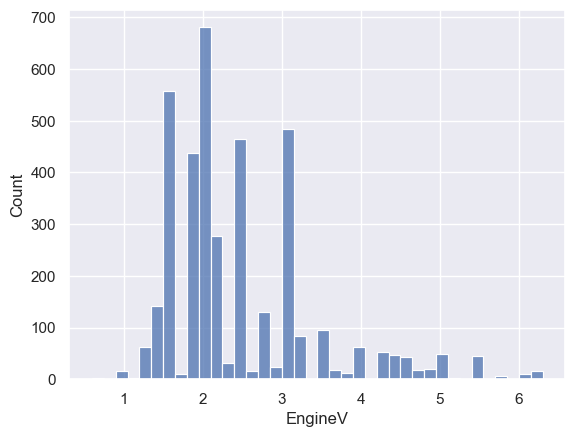

In [13]:
# The values of 99.9 in the engine volume show some missing values as they are written as 99.9 in the rows
# The values of Engine volume is between 0.5 to 6.5
data = data[data['EngineV'] < 6.5]
sns.histplot(data['EngineV'])
# Now the outliers are gone

<Axes: xlabel='Year', ylabel='Count'>

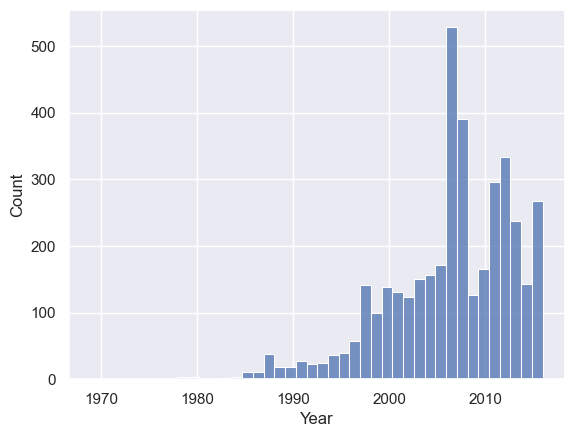

In [14]:
sns.histplot(data['Year'])

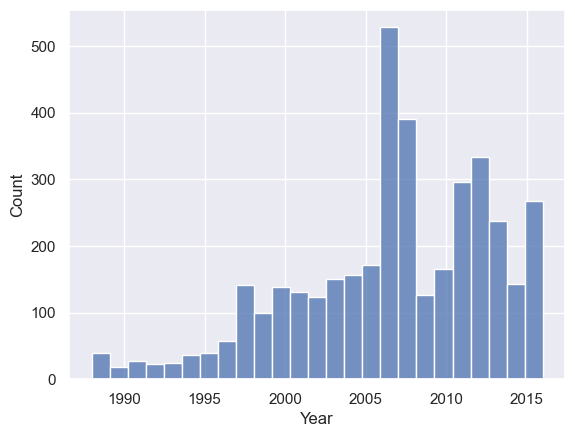

In [15]:
q = data['Year'].quantile(0.01)
data = data[data['Year'] > q]
sns.histplot(data['Year']);

In [16]:
data.reset_index(drop = True, inplace = True)

### Checking the OLS assumptions

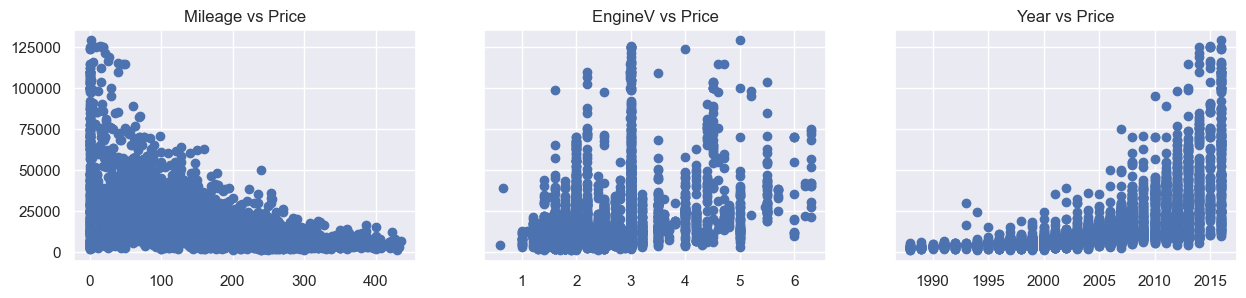

In [17]:
# To check for linearity, we check for the relation of each with the price 
# here we want to predict price that's why its used at the y axis 
fig , (ax1, ax2, ax3) = plt.subplots( 1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Mileage'], data['Price'])
ax1.set_title('Mileage vs Price')

ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('EngineV vs Price')

ax3.scatter(data['Year'], data['Price'])
ax3.set_title('Year vs Price')

plt.show()

In [18]:
# As the price is showing exponential behaviour so we have to ensure linearity
# Log transformation are especially useful when facing exponential relationships 

log_price = np.log(data['Price'])
data.loc[:, 'log_price'] = log_price.copy()


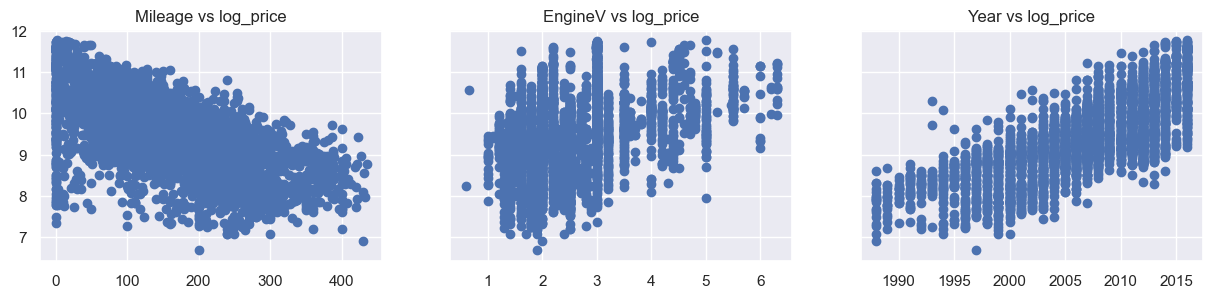

In [19]:
# To check for linearity, we check for the relation of each with the price 
# here we want to predict price that's why its used at the y axis 
fig , (ax1, ax2, ax3) = plt.subplots( 1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Mileage'], data['log_price'])
ax1.set_title('Mileage vs log_price')

ax2.scatter(data['EngineV'], data['log_price'])
ax2.set_title('EngineV vs log_price')

ax3.scatter(data['Year'], data['log_price'])
ax3.set_title('Year vs log_price')

plt.show()

Now it's showing more of a linear behaviour as the linear regression line seems more fitting

In [20]:
# Now lets remove the previous price column since it is no longer needed 
data.drop('Price', axis = 1, inplace = True)

In [21]:
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


1. There is no homoscadicity as we have already applied log transformation
2. Normality is there as according to central limit theorem
3. There is no autocorrelation as the data is not time series based

### Multicollinearity

In [22]:
data.columns.values
# There can be a correlation between mileage and year
# As mileage it represents the total distance the vehicle has covered since it was manufactured or put 
# into use, so more years means more miles covered 

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [23]:
# We have to calculate variance inflation factor VIF to get an idea of any correlation between the elements
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [24]:
vif
# Vif = 1 : no multicolineraity
# 1 < Vif < 5 : perfectly okay
# 10 < Vif : unacceptable

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [25]:
# It seems that year is too correlated with all the other factors so we need to drop it 
data.drop('Year', axis = 1, inplace = True)

In [26]:
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Create Dummy Variables

In [27]:
data = pd.get_dummies(data , drop_first = True)
data
# We have dropped first for dummy generation to avoid multicollinearity

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [28]:
variables = data[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi' , 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van']]
viff = pd.DataFrame()
viff['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
viff['features'] = variables.columns
viff
# It indicates no multicollinearity

,VIF,features
0,0.002273,Brand_BMW
1,0.002245,Brand_Mercedes-Benz
2,0.003713,Brand_Mitsubishi
3,0.003838,Brand_Renault
4,0.002460,Brand_Toyota
5,0.002309,Brand_Volkswagen
6,0.005015,Body_hatch
7,0.003645,Body_other
8,0.001480,Body_sedan
9,0.003497,Body_vagon


### Rearranging the columns a bit

In [29]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [30]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [31]:
columns_to_map = ['Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
# Create a mapping function
mapping_function = lambda x: 1 if x else 0
data_preprocessed[columns_to_map] = data_preprocessed[columns_to_map].applymap(mapping_function)

In [32]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

### Declare Inputs and the targets

In [33]:
target = data_preprocessed['log_price']
features = data_preprocessed.drop('log_price', axis = 1)
target

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: log_price, Length: 3867, dtype: float64

### Feature Scaling 

In [34]:
from sklearn.feature_selection import f_regression

# Scale features while keeping DataFrame structure
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Perform feature selection
f_value, p_value = f_regression(scaled_features_df, target)
significance_level = 0.05
selected_features = scaled_features_df.columns[p_value < significance_level]

# Select the scaled features based on the feature selection
selected_scaled_features = scaled_features_df[selected_features]
selected_scaled_features

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol,Registration_yes
0,1.217908,-0.474525,2.279718,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,1.279059,-0.326248,-0.432769,-0.414938,1.332675,0.321374
1,2.786602,0.473599,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,-0.781825,-0.326248,2.310702,-0.414938,-0.750370,0.321374
2,2.065003,2.685886,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,1.279059,-0.326248,-0.432769,2.410000,-0.750370,0.321374
3,0.830963,1.843110,-0.438651,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,-0.781825,-0.326248,-0.432769,-0.414938,1.332675,0.321374
4,-0.423992,-0.474525,-0.438651,-0.492554,-0.291054,-0.354632,2.600973,-0.529988,-0.264586,-0.325277,-0.781825,-0.326248,-0.432769,-0.414938,1.332675,0.321374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.025700,0.052210,-0.438651,-0.492554,-0.291054,-0.354632,-0.384472,1.886834,-0.264586,-0.325277,-0.781825,-0.326248,2.310702,-0.414938,-0.750370,0.321374
3863,-1.312919,-0.895913,-0.438651,-0.492554,-0.291054,-0.354632,2.600973,-0.529988,-0.264586,-0.325277,1.279059,-0.326248,-0.432769,-0.414938,1.332675,0.321374
3864,-1.584826,0.578946,-0.438651,2.030235,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,1.279059,-0.326248,-0.432769,-0.414938,-0.750370,0.321374
3865,-1.668490,1.105681,2.279718,-0.492554,-0.291054,-0.354632,-0.384472,-0.529988,-0.264586,-0.325277,1.279059,-0.326248,-0.432769,-0.414938,1.332675,0.321374


### Train Test Split

In [35]:
# x referes to the features and the y referes to the target
# Test size is 0.2 so we can have 80 20 split
# when you use the same value (365) in different runs of your code.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 365)

### Create Regression Model
This is a log linear regression model as we have taken in the log values of dependent element

In [36]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
y_hat = reg.predict(x_train)

(6.0, 13.0)

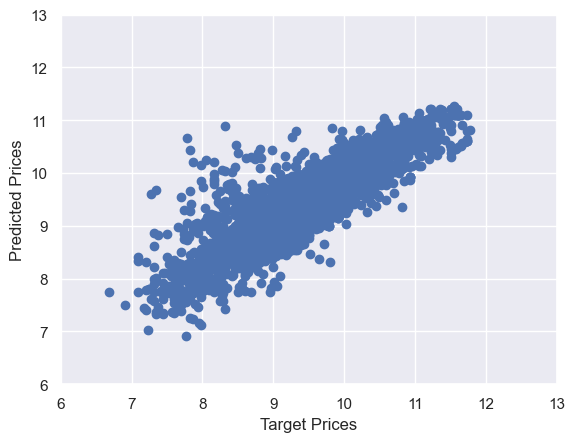

In [38]:
plt.scatter(y_train, y_hat)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')
plt.xlim(6, 13)
plt.ylim(6, 13)

it seems that it is not perfectly but mostly making right observations

<Axes: xlabel='log_price', ylabel='Density'>

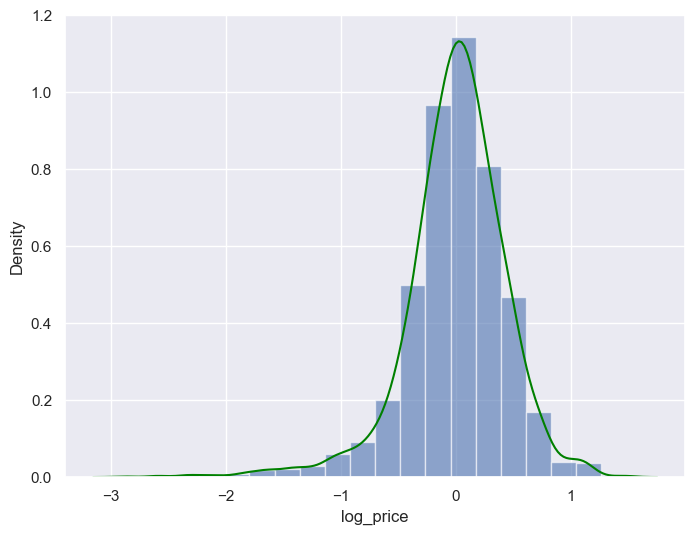

In [39]:
# Residual Plot = Difference between target and prediction
residuals = y_train - y_hat

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create a histogram of residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, label='Histogram')

# Add a kernel density estimate (KDE) line plot
sns.kdeplot(residuals, color='green', label='KDE')

It outliers on the left side show that there are some of the values for which the observed value is higher than the original prices

### Weights and bias

In [40]:
coefficients = reg.coef_  # Replace with your actual coefficient values
reg_summary = pd.DataFrame({'Features': data_preprocessed.drop('log_price', axis=1).columns, 'Weight': coefficients})

In [41]:
reg_summary

,Features,Weight
0,Mileage,-0.004693
1,EngineV,0.220212
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


The dummies are compareable to the bench mark of dummies as Audi was the bench mark of Brand of cars the negative weight of brand shows it is cheaper than Audi and positive show the vice versa

### Testing

In [42]:
y_hat_predict = reg.predict(x_test)

(6.0, 13.0)

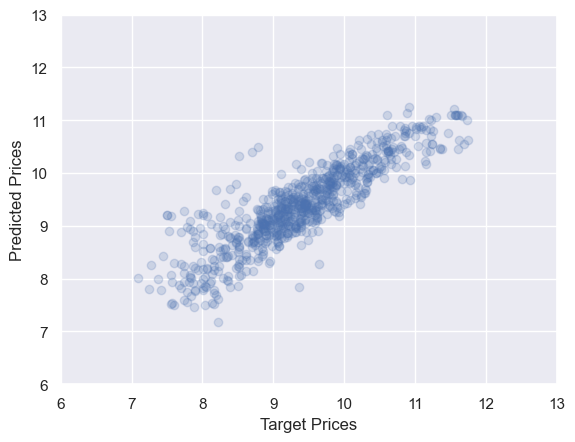

In [43]:
plt.scatter(y_test, y_hat_predict, alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')
plt.xlim(6, 13)
plt.ylim(6, 13)

In [44]:
# To see how well we have predicted 
predicted_value = pd.DataFrame(np.exp(y_hat_predict), columns = ['Predicted Price'])
predicted_value['Target'] = np.exp(y_test)
predicted_value
# The problem here is due the preserved indicies of Target values and we have to reset them to achieve 
# proper result

,Predicted Price,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [45]:
y_test = y_test.reset_index(drop = True)
predicted_value.drop('Target', axis = 1, inplace = True)
predicted_value['Target'] = np.exp(y_test)
predicted_value

,Predicted Price,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [46]:
predicted_value['Residual'] =  predicted_value['Target'] - predicted_value['Predicted Price'] 
predicted_value
# The ols model is based on minimizing the residual so exploring residual is the best approach to check the model

,Predicted Price,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


In [47]:
predicted_value['Difference%'] = np.absolute(predicted_value['Residual']/predicted_value['Target']* 100)
predicted_value

,Predicted Price,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [48]:
predicted_value.sort_values(by = 'Difference%')

,Predicted Price,Target,Residual,Difference%
698,30480.847838,30500.0,19.152162,0.062794
742,16960.310476,16999.0,38.689524,0.227599
60,12469.207487,12500.0,30.792513,0.246340
110,25614.137960,25500.0,-114.137960,0.447600
367,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...
657,32481.045510,6000.0,-26481.045510,441.350758
162,9954.416247,1800.0,-8154.416247,453.023125
451,35956.498331,6500.0,-29456.498331,453.176897
532,10019.903027,1800.0,-8219.903027,456.661279


Text(0.5, 0, 'Target Prices')

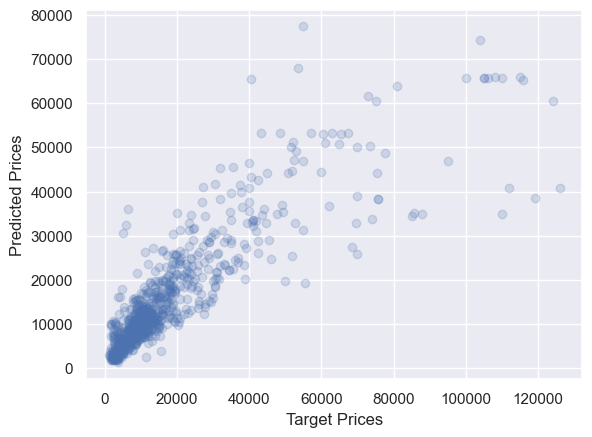

In [49]:
plt.scatter(predicted_value['Target'], predicted_value['Predicted Price'], alpha = 0.2)
plt.ylabel('Predicted Prices')
plt.xlabel('Target Prices')